# Benchmark Comparison and Visualization

This notebook compares multiple benchmark results and creates visualizations.

## Usage
1. Paste multiple JSON benchmark summaries in the list below
2. Optionally add labels for each benchmark
3. Run the cells to see comparisons and visualizations

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Any

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Input: Paste your benchmark JSONs here

In [9]:
# List of benchmark JSON strings
benchmark_jsons = [
    # Example - replace with your actual benchmark JSONs
    '{"benchmarks": {"resolve_circuit": {"duration_s": 232.22, "mem_before_mb": 361.11, "mem_after_mb": 17495.4, "mem_delta_mb": 17134.29, "peak_mem_mb": 23284.43}, "add_node_set": {"duration_s": 0.58, "mem_before_mb": 17477.4, "mem_after_mb": 7956.37, "mem_delta_mb": -9521.03, "peak_mem_mb": 17477.4}, "split_subcircuit": {"duration_s": 19.69, "mem_before_mb": 7956.37, "mem_after_mb": 8334.23, "mem_delta_mb": 377.86, "peak_mem_mb": 9149.98}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "register_circuit_folder_asset": {"duration_s": 1.3, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "run_circuit_folder_compression": {"duration_s": 0.4, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "add_compressed_circuit_asset": {"duration_s": 0.3, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "run_connectivity_matrix_extraction": {"duration_s": 0.41, "mem_before_mb": 8334.23, "mem_after_mb": 8344.73, "mem_delta_mb": 10.5, "peak_mem_mb": 8344.73}, "add_connectivity_matrix_asset": {"duration_s": 0.2, "mem_before_mb": 8344.73, "mem_after_mb": 8344.73, "mem_delta_mb": 0.0, "peak_mem_mb": 8344.73}, "run_basic_connectivity_plots": {"duration_s": 2.37, "mem_before_mb": 8344.73, "mem_after_mb": 1081.03, "mem_delta_mb": -7263.7, "peak_mem_mb": 8508.76}, "add_connectivity_plot_assets": {"duration_s": 2.1, "mem_before_mb": 1081.03, "mem_after_mb": 1062.67, "mem_delta_mb": -18.36, "peak_mem_mb": 1201.55}, "generate_overview_figures": {"duration_s": 0.5, "mem_before_mb": 1062.67, "mem_after_mb": 1078.39, "mem_delta_mb": 15.72, "peak_mem_mb": 1078.39}, "add_overview_figure_assets": {"duration_s": 0.92, "mem_before_mb": 1078.39, "mem_after_mb": 1094.58, "mem_delta_mb": 16.19, "peak_mem_mb": 1127.17}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 1094.58, "mem_after_mb": 1094.58, "mem_delta_mb": 0.0, "peak_mem_mb": 1094.58}}, "benchmarked_time_s": 261.29, "total_execution_time_s": 261.38, "unbenchmarked_time_s": 0.09, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 395.04, "mem_before_mb": 361.41, "mem_after_mb": 12036.43, "mem_delta_mb": 11675.02, "peak_mem_mb": 23102.28}, "add_node_set": {"duration_s": 1.08, "mem_before_mb": 12036.43, "mem_after_mb": 390.41, "mem_delta_mb": -11646.02, "peak_mem_mb": 12051.08}, "split_subcircuit": {"duration_s": 26.19, "mem_before_mb": 390.41, "mem_after_mb": 698.2, "mem_delta_mb": 307.79, "peak_mem_mb": 1583.51}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "register_circuit_folder_asset": {"duration_s": 2.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_circuit_folder_compression": {"duration_s": 4.01, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "add_compressed_circuit_asset": {"duration_s": 0.5, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "add_overview_figure_assets": {"duration_s": 34.75, "mem_before_mb": 698.2, "mem_after_mb": 691.66, "mem_delta_mb": -6.54, "peak_mem_mb": 756.82}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 691.66, "mem_after_mb": 691.66, "mem_delta_mb": 0.0, "peak_mem_mb": 691.66}}, "benchmarked_time_s": 464.27, "total_execution_time_s": 464.35, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 285.08, "mem_before_mb": 362.06, "mem_after_mb": 15931.89, "mem_delta_mb": 15569.82, "peak_mem_mb": 23049.77}, "add_node_set": {"duration_s": 0.86, "mem_before_mb": 15907.89, "mem_after_mb": 393.4, "mem_delta_mb": -15514.49, "peak_mem_mb": 15907.89}, "split_subcircuit": {"duration_s": 22.09, "mem_before_mb": 393.4, "mem_after_mb": 762.13, "mem_delta_mb": 368.73, "peak_mem_mb": 1588.1}, "copy_morph_hoc_mod": {"duration_s": 3.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "register_circuit_folder_asset": {"duration_s": 4.01, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_circuit_folder_compression": {"duration_s": 44.78, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "add_compressed_circuit_asset": {"duration_s": 1.3, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "add_overview_figure_assets": {"duration_s": 36.36, "mem_before_mb": 762.13, "mem_after_mb": 763.57, "mem_delta_mb": 1.45, "peak_mem_mb": 763.57}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 763.57, "mem_after_mb": 763.57, "mem_delta_mb": 0.0, "peak_mem_mb": 763.57}}, "benchmarked_time_s": 398.08, "total_execution_time_s": 398.16, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 301.84, "mem_before_mb": 363.2, "mem_after_mb": 16270.74, "mem_delta_mb": 15907.54, "peak_mem_mb": 23077.01}, "add_node_set": {"duration_s": 0.82, "mem_before_mb": 16250.74, "mem_after_mb": 7805.61, "mem_delta_mb": -8445.13, "peak_mem_mb": 16250.74}, "split_subcircuit": {"duration_s": 53.45, "mem_before_mb": 7805.61, "mem_after_mb": 8185.47, "mem_delta_mb": 379.86, "peak_mem_mb": 9039.05}, "copy_morph_hoc_mod": {"duration_s": 17.83, "mem_before_mb": 8185.47, "mem_after_mb": 8185.73, "mem_delta_mb": 0.25, "peak_mem_mb": 8185.73}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 8185.73, "mem_after_mb": 8185.73, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.73}, "register_circuit_folder_asset": {"duration_s": 24.53, "mem_before_mb": 8185.73, "mem_after_mb": 8185.99, "mem_delta_mb": 0.26, "peak_mem_mb": 8185.99}, "run_circuit_folder_compression": {"duration_s": 402.41, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "add_compressed_circuit_asset": {"duration_s": 6.51, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}}, "benchmarked_time_s": 807.89, "total_execution_time_s": 807.99, "unbenchmarked_time_s": 0.1, "unbenchmarked_percentage": 0.0}',
]

# Optional: Labels for each benchmark (e.g., circuit size, configuration)
# If not provided, will use "Run 1", "Run 2", etc.
benchmark_labels = [
    "nbS1-HEX0 (10 neurons)",
    "nbS1-HEX0 (100 neurons)",
    "nbS1-HEX0 (1000 neurons)",
    "nbS1-HEX0 (10000 neurons)",
]

## Parse and convert to DataFrame

In [10]:
def parse_benchmarks(json_strings: list[str], labels: list[str] | None = None) -> pd.DataFrame:
    """Parse benchmark JSONs and convert to a pandas DataFrame."""
    if labels is None:
        labels = [f"Run {i+1}" for i in range(len(json_strings))]
    
    if len(labels) != len(json_strings):
        raise ValueError(f"Number of labels ({len(labels)}) must match number of benchmarks ({len(json_strings)})")
    
    rows = []
    
    for label, json_str in zip(labels, json_strings):
        data = json.loads(json_str)
        benchmarks = data.get("benchmarks", {})
        
        # Add overall metrics
        row = {
            "label": label,
            "benchmarked_time_s": data.get("benchmarked_time_s"),
            "total_execution_time_s": data.get("total_execution_time_s"),
            "unbenchmarked_time_s": data.get("unbenchmarked_time_s"),
            "unbenchmarked_percentage": data.get("unbenchmarked_percentage"),
        }
        
        # Add individual section metrics
        for section_name, section_data in benchmarks.items():
            row[f"{section_name}_duration_s"] = section_data.get("duration_s")
            row[f"{section_name}_mem_delta_mb"] = section_data.get("mem_delta_mb")
            row[f"{section_name}_peak_mem_mb"] = section_data.get("peak_mem_mb")
        
        rows.append(row)
    
    return pd.DataFrame(rows)


# Parse the benchmarks
df = parse_benchmarks(benchmark_jsons, benchmark_labels)
print("Benchmark DataFrame:")
display(df)

Benchmark DataFrame:


,label,benchmarked_time_s,total_execution_time_s,unbenchmarked_time_s,unbenchmarked_percentage,resolve_circuit_duration_s,resolve_circuit_mem_delta_mb,resolve_circuit_peak_mem_mb,add_node_set_duration_s,add_node_set_mem_delta_mb,...,add_connectivity_plot_assets_peak_mem_mb,generate_overview_figures_duration_s,generate_overview_figures_mem_delta_mb,generate_overview_figures_peak_mem_mb,add_overview_figure_assets_duration_s,add_overview_figure_assets_mem_delta_mb,add_overview_figure_assets_peak_mem_mb,cleanup_duration_s,cleanup_mem_delta_mb,cleanup_peak_mem_mb
0,nbS1-HEX0 (10 neurons),261.29,261.38,0.09,0.0,232.22,17134.29,23284.43,0.58,-9521.03,...,1201.55,0.5,15.72,1078.39,0.92,16.19,1127.17,0.1,0.0,1094.58
1,nbS1-HEX0 (100 neurons),464.27,464.35,0.08,0.0,395.04,11675.02,23102.28,1.08,-11646.02,...,NaN,0.1,0.00,698.20,34.75,-6.54,756.82,0.1,0.0,691.66
2,nbS1-HEX0 (1000 neurons),398.08,398.16,0.08,0.0,285.08,15569.82,23049.77,0.86,-15514.49,...,NaN,0.1,0.00,762.13,36.36,1.45,763.57,0.1,0.0,763.57
3,nbS1-HEX0 (10000 neurons),807.89,807.99,0.10,0.0,301.84,15907.54,23077.01,0.82,-8445.13,...,NaN,0.1,0.00,8185.99,NaN,NaN,NaN,0.1,0.0,8185.99


## Summary Statistics

In [11]:
# Show summary of key metrics
summary_cols = ["label", "total_execution_time_s", "benchmarked_time_s", "unbenchmarked_time_s", "unbenchmarked_percentage"]
summary_df = df[summary_cols]
print("\nExecution Time Summary:")
display(summary_df)


Execution Time Summary:


,label,total_execution_time_s,benchmarked_time_s,unbenchmarked_time_s,unbenchmarked_percentage
0,nbS1-HEX0 (10 neurons),261.38,261.29,0.09,0.0
1,nbS1-HEX0 (100 neurons),464.35,464.27,0.08,0.0
2,nbS1-HEX0 (1000 neurons),398.16,398.08,0.08,0.0
3,nbS1-HEX0 (10000 neurons),807.99,807.89,0.10,0.0


## Visualization 1: Total Execution Time Comparison

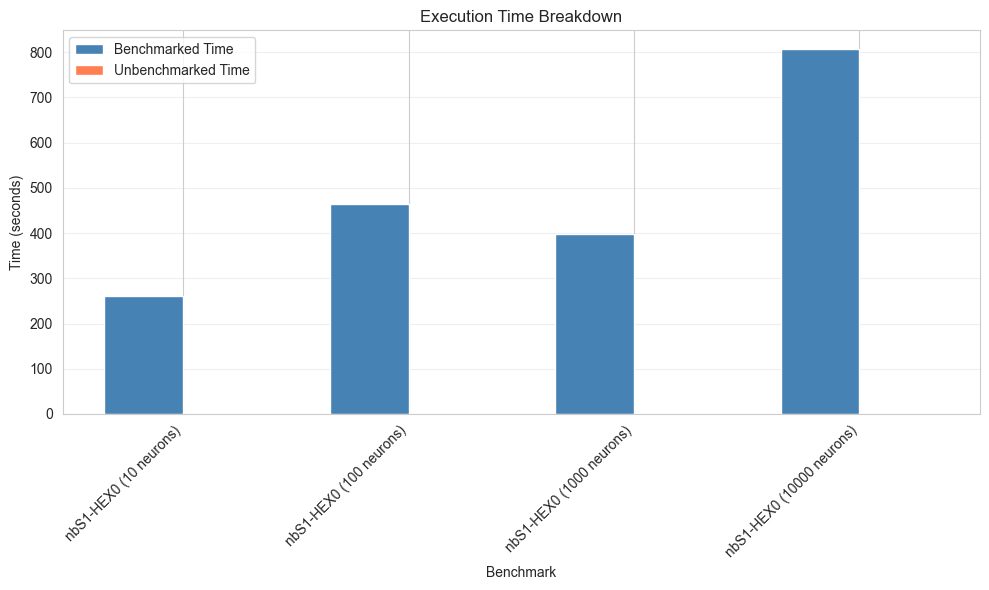

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(df))
width = 0.35

ax.bar([i - width/2 for i in x], df['benchmarked_time_s'], width, label='Benchmarked Time', color='steelblue')
ax.bar([i + width/2 for i in x], df['unbenchmarked_time_s'], width, label='Unbenchmarked Time', color='coral')

ax.set_xlabel('Benchmark')
ax.set_ylabel('Time (seconds)')
ax.set_title('Execution Time Breakdown')
ax.set_xticks(x)
ax.set_xticklabels(df['label'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Visualization 2: Section Duration Comparison

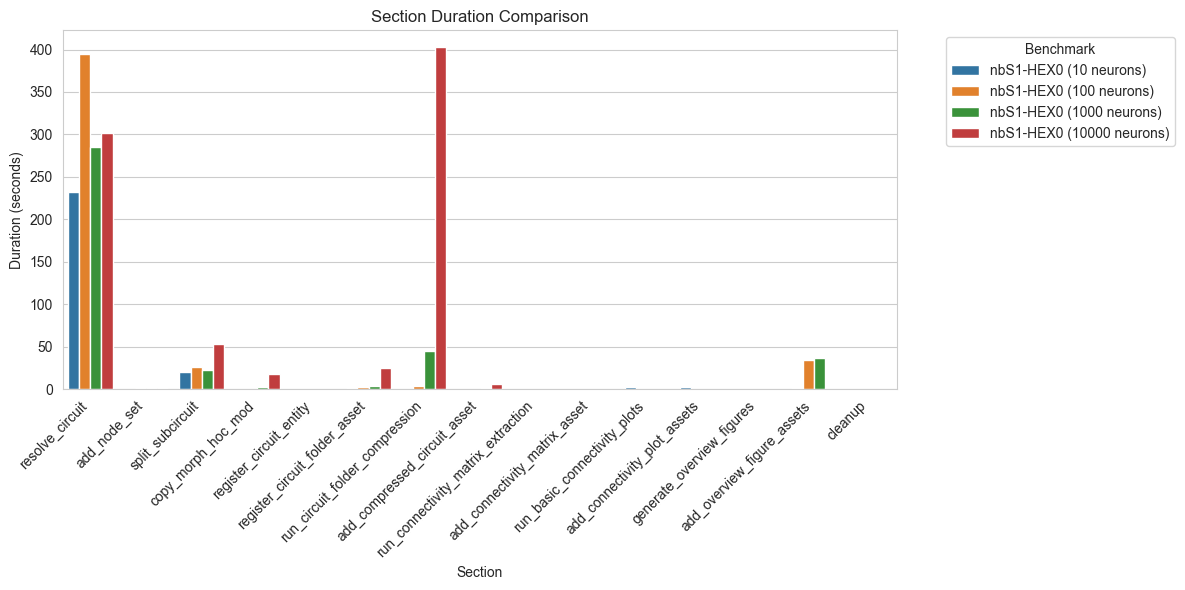

In [13]:
# Extract section duration columns
duration_cols = [col for col in df.columns if col.endswith('_duration_s')]

if duration_cols:
    # Create a DataFrame for section durations
    section_data = df[['label'] + duration_cols].copy()
    section_data.columns = ['label'] + [col.replace('_duration_s', '') for col in duration_cols]
    
    # Melt for easier plotting
    section_melted = section_data.melt(id_vars='label', var_name='Section', value_name='Duration (s)')
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=section_melted, x='Section', y='Duration (s)', hue='label', ax=ax)
    ax.set_title('Section Duration Comparison')
    ax.set_xlabel('Section')
    ax.set_ylabel('Duration (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Benchmark', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No section duration data found.")

## Visualization 3: Peak Memory Usage

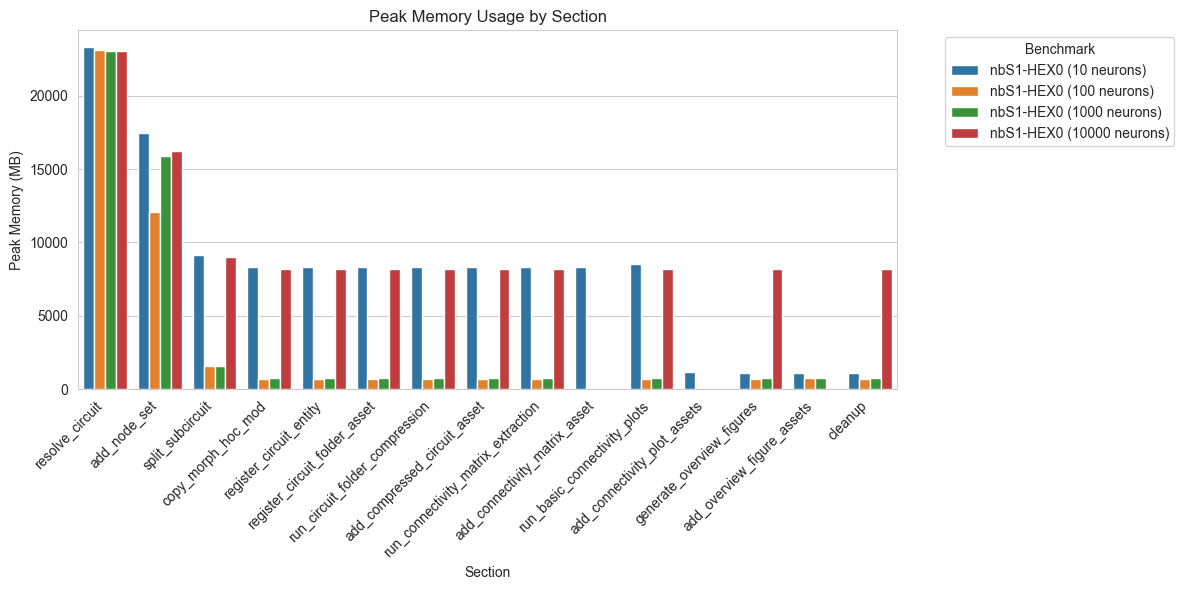

In [14]:
# Extract peak memory columns
peak_mem_cols = [col for col in df.columns if col.endswith('_peak_mem_mb')]

if peak_mem_cols:
    # Create a DataFrame for peak memory
    mem_data = df[['label'] + peak_mem_cols].copy()
    mem_data.columns = ['label'] + [col.replace('_peak_mem_mb', '') for col in peak_mem_cols]
    
    # Melt for easier plotting
    mem_melted = mem_data.melt(id_vars='label', var_name='Section', value_name='Peak Memory (MB)')
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=mem_melted, x='Section', y='Peak Memory (MB)', hue='label', ax=ax)
    ax.set_title('Peak Memory Usage by Section')
    ax.set_xlabel('Section')
    ax.set_ylabel('Peak Memory (MB)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Benchmark', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No peak memory data found.")

## Visualization 4: Stacked Time Breakdown

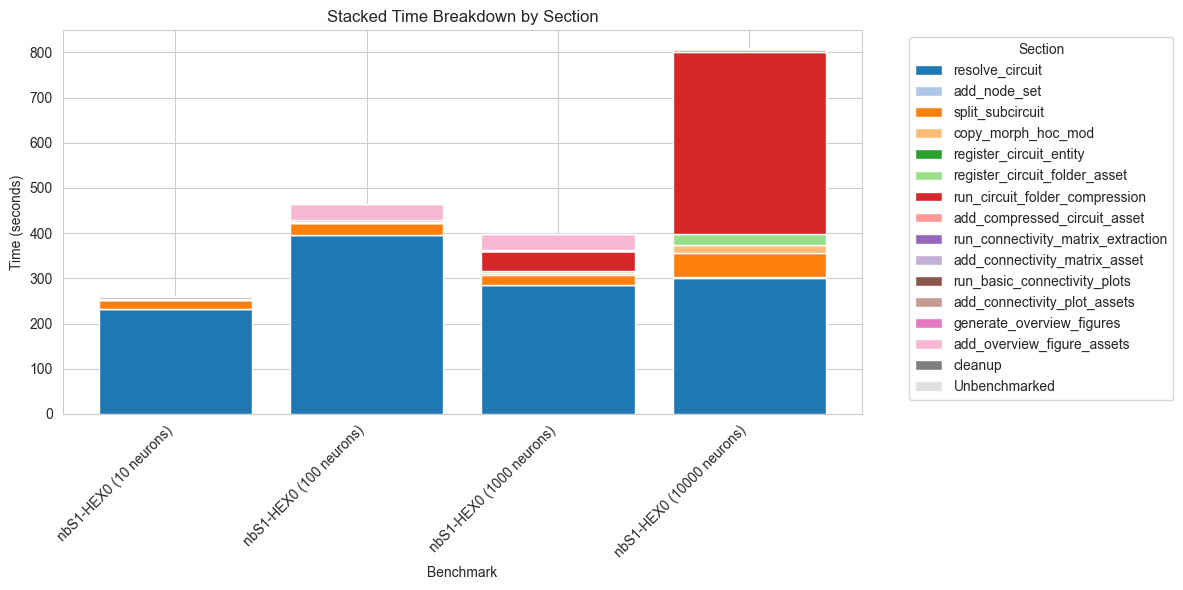

In [15]:
if duration_cols:
    # Prepare data for stacked bar chart
    section_names = [col.replace('_duration_s', '') for col in duration_cols]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create stacked bars
    bottom = [0] * len(df)
    colors = plt.cm.tab20(range(len(duration_cols)))
    
    for i, col in enumerate(duration_cols):
        section_name = section_names[i]
        values = df[col].fillna(0)
        ax.bar(df['label'], values, bottom=bottom, label=section_name, color=colors[i])
        bottom = [b + v for b, v in zip(bottom, values)]
    
    # Add unbenchmarked time on top
    if 'unbenchmarked_time_s' in df.columns:
        ax.bar(df['label'], df['unbenchmarked_time_s'].fillna(0), bottom=bottom, 
               label='Unbenchmarked', color='lightgray', alpha=0.7)
    
    ax.set_xlabel('Benchmark')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Stacked Time Breakdown by Section')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No section duration data found.")

## Export DataFrame to CSV (Optional)

In [ ]:
# Uncomment to save the DataFrame to CSV
# df.to_csv('benchmark_comparison.csv', index=False)
# print("DataFrame saved to benchmark_comparison.csv")